In [168]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [169]:
from fastai import *  # importing diffrent modeules required
from fastai.vision import *
from fastai.metrics import *

In [170]:
df_train = pd.read_csv("/home/sahib/digit_recogn/data/train.csv")
df_test = pd.read_csv("/home/sahib/digit_recogn/data/test.csv")

In [171]:
images=df_train.iloc[:,1:] # all rows and all columns except 1 beacsue 
# it contains label and not pixel values of  image


In [172]:
lbl=df_train.iloc[:,:1]

In [173]:
image=images.to_numpy() #convert pandas to numpy

In [174]:
image.shape
# 784(28 x 28) is the dimension of image and we have to 4200 images

(42000, 784)

In [175]:
image=image.reshape(-1,28,28)# 28 x 28 images 
# -1 tells  that we don't know the first dimension

In [176]:
image.shape
# it has 42000 rows of 28 x 28 matrices
#i.e every matrice s an image now

(42000, 28, 28)

In [177]:
train_img=np.stack((image,)*3, axis=-1).astype('float32')
  

# have to understand 4 dimensional array in numpy ?
# to understand the dimension of train_img and test_img

In [178]:
test_img=df_test.to_numpy()
test_img=test_img.reshape(-1,28,28)

In [179]:
test_img=np.stack((test_img,)*3,axis=-1).astype('float32')

In [91]:
# extra testing not required
#img=image[41999]
#img.shape
#plt.imshow(img)

[to understand stack op](https://www.geeksforgeeks.org/numpy-stack-in-python/) 
#  In numpy array

In [105]:
! mkdir train # make a training directory

In [123]:
lbl=lbl['label'].values.tolist() 
for label in lbl:# to make directories of given digits
    if os.path.isdir('/home/sahib/digit_recogn/train/'+str(label)):
        continue
    else:
        os.mkdir('/home/sahib/digit_recogn/train/'+str(label))
    

In [178]:
#not required
#plt.imshow(train_img[3])
#plt.savefig('')

In [177]:
#saving images in there respective folders
#we saved images in correct folder because earlier we knew label of each was attached to
#784 columns of that image adjacently and we have not changed there order hence all
#images will go in there respective folders
os.chdir('/home/sahib')
import cv2
i=0
while i<len(lbl):
    os.chdir('/home/sahib/digit_recogn/train/'+str(lbl[i]))
    print('/home/sahib/digit_recogn/train/'+str(lbl[i]))
    #plt.savefig()
    cv2.imwrite(str(lbl[i])+'_'+str(i)+'.jpg',train_img[i])# first is the name for the image second is the image 
    #which is to be stored
    os.chdir('/home/sahib/digit_recogn/train/')
    i+=1


/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahi

/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahi

/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahi

/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahi

/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahi

/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahi

/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahi

/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahi

/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahi

/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahi

/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahi

/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahi

/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahi

/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahi

/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahi

/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahi

/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahi

/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahi

/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahi

/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahi

/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahi

/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahi

/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahi

/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahi

/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahi

/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahi

/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahi

/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahi

/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahi

/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahi

/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahi

/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahi

/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahi

/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahi

/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahi

/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahi

/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahi

/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahi

/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahi

/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahi

/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahi

/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/8
/home/sahi

/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahi

/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahi

/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/8
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/9
/home/sahi

/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/1
/home/sahib/digit_recogn/train/2
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/4
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/0
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/5
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/6
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/3
/home/sahib/digit_recogn/train/7
/home/sahib/digit_recogn/train/9
/home/sahib/digit_recogn/train/4
/home/sahi

In [140]:
path='/home/sahib/digit_recogn/'
data=ImageDataBunch.from_folder(path,valid_pct=0.25,size=28)

In [192]:
# so we have some corrupt images 
#we have to delete them
classes=list(set(lbl))
for c in classes:
    print(c)
    path=path+'train/'+str(c)
    verify_images(path, delete=True, max_workers=8)
    os.chdir(path)

In [181]:
#again creating Databunch
# we have not applied any ranformation 
#beacuse it is not useful here i suppose
# we have sufficient data
path='/home/sahib/digit_recogn/'
data=ImageDataBunch.from_folder(path,valid_pct=0.25,size=28)

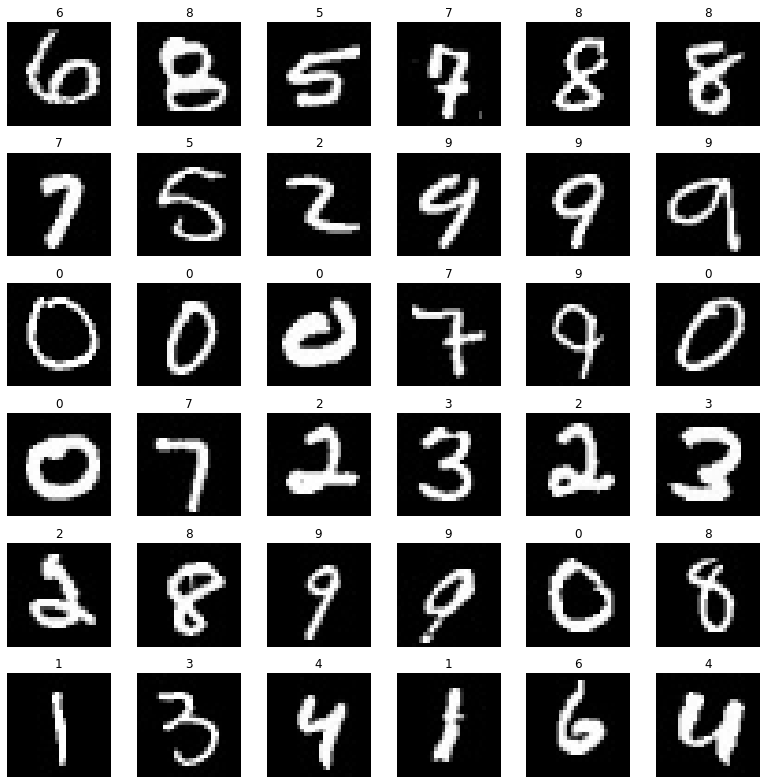

In [333]:
data.show_batch(rows=6, figsize=(11,11))# random batch of images


In [182]:
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [183]:
arch=models.resnet50
learn=cnn_learner(data=data,base_arch=arch,metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


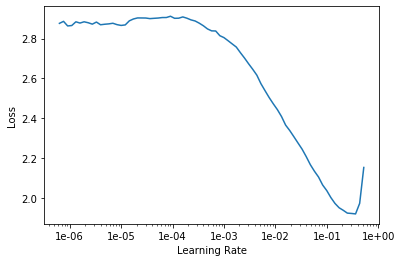

In [144]:
learn.lr_find()
learn.recorder.plot()

In [184]:
learn.fit_one_cycle(8,slice(1e-2/5,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.360359,0.242407,0.926381,09:21
1,0.142058,0.104980,0.970190,10:43
2,0.104562,0.062800,0.980857,11:12
3,0.073921,0.044122,0.985619,10:44
4,0.047223,0.039384,0.989333,12:41
5,0.030778,0.029521,0.991905,12:04
6,0.017404,0.027426,0.992667,09:37
7,0.009757,0.025903,0.992857,09:25


[diffrence between model and architecture](https://www.quora.com/What-is-the-difference-between-deep-learning-model-and-deep-learning-architecture)
#  and
[diffrence between parameters and hyperparameters](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/)

# Above links are important becauseby  learner.save()   Only the parameters are saved, not the actual architecture

In [185]:
learn.save('mnist-4-50-kaggle',return_path=1)#return_path is used to see the path where model is saved


PosixPath('/home/sahib/digit_recogn/models/mnist-4-50-kaggle.pth')

In [246]:
# not required
#test_i=test_img[20]
#plt.imshow(test_i)
#test_i

# USing model for Inference

In [16]:
learn.export()
#transforms, classes, normalization...), the model with its weights and all the callbacks our Learner was using. 
#Everything will be in a file named export.pkl in the folder learn.path.
#If you deploy your model on a different machine, this is the file you'll need to copy.

# ------------------

In [17]:
path='/home/sahib/digit_recogn/'
learn = load_learner(path)# path where export.pkl file is stored

In [41]:
# storing images to be tested in test folder
import cv2
os.chdir('/home/sahib/digit_recogn/test/')
for i in range(test_img.shape[0]):
    
    cv2.imwrite(str(i)+'.jpg',test_img[i])
    

In [29]:
learn = load_learner(path, test=ImageList.from_folder('/home/sahib/digit_recogn/test'))
# learner created for inference

In [111]:
#preds,y=learn.get_preds(ds_type=DatasetType.Test)

In [392]:
preds=preds.numpy()
preds.shape

(28000, 10)

In [202]:
ImageId=[]
#Label=[]

In [186]:
for i in range(test_img.shape[0]):
    img=open_image('/home/sahib/digit_recogn/test/%s.jpg'%(i))
    le=learn.predict(img)[0]
    ImageId.append(i)
    Label.append(le)
    if i%100==0:
        print(i)
    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [125]:
#Testing purpose
#img.shape
#le=learn.predict(img)
#le

In [201]:
len(ImageId)

56000

In [198]:
temp=[]
for i in range(test_img.shape[0]):
    i=int(str(Label[i])[0])
    temp.append(i)

In [200]:
len(temp)

28000

In [204]:
df1=pd.DataFrame(
{
    'ImageId':ImageId,
    'Label':temp
})

In [205]:
df1.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [206]:
df1.to_csv("/home/sahib/submission1.csv", index=False)

# so we have to shift the Dataframe by 1 then write to csv because that is required

In [203]:
for i in range(1,28001):
    ImageId.append(i)

In [164]:
ImageId

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [165]:
df2=pd.DataFrame(
{
    'ImageId':ImageId,
    'Label':Label
})

In [166]:
df2.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [167]:
df2.to_csv("/home/sahib/submission1.csv", index=False)